In [231]:
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from positivitree.tree_vis import visualize_leaves_static, visualize_leaves_interactive
from positivitree import PositiviTree
import pandas as pd
import sys, os
sys.path.append('../')
sys.path.append('./overlap-code')

from utils import get_data

In [3]:
np.random.seed(123)

In [3]:
df = pd.read_csv('../data/synth_2d_df.csv')
a = df['t']
X = df[['x1', 'x2']]

In [ ]:
ptree = PositiviTree(X, a,
                     violation_cutoff=0.1, consistency_cutoff=0.99,
                     n_consistency_tests=200, relative_violations=False,
                     # search_kws={"n_iter": 200},
                     dtc_kws={"criterion": "entropy"},
                     rfc_kws={"max_features": "auto"}
                     )

flagged_leaves = ptree._flag_out_leaves()
violating_samples = ptree._get_violating_samples_mask()
counts = ptree._count_violating_samples_in_forest(normalize=True)
tree_json_full = ptree.export_tree()
scores = ptree.evaluate_fit(plot_roc=True)

ax = visualize_leaves_static(ptree)
visualization_data = visualize_leaves_interactive(ptree, output_path='results/positivitree_viz_synth_2d.html')

print("End.")

In [15]:
leaves = ptree.export_leaves(extract_rules_kws={"clause_joiner": None})
violating_leaves = [leaf for leaf in leaves if leaf['is_violating']]

q_set = set()
for leaf in violating_leaves:
    for q in leaf['query']:
        print(q)
        q_set.add(q.feature_name)

print(len(q_set))
print(q_set)

(x2>0.011525199748575687)
(x1>-0.00043236499186605215)
2
{'x1', 'x2'}


In [232]:
X_df, a, y = get_data()
X_df.shape

(5649, 256)

In [81]:
data = pd.read_csv('../data/fp_injectables_data.csv')

remove = ['v213', 'v210']
X_ = data[data.columns[:-2]]
X = X_.drop(columns=remove)
c = X.corr().abs()
c = c * np.tri(c.shape[0], c.shape[1], -1)
c = c.transpose()

thresholds = [.99, .98, .97, .96, .95, .94, .93, .92, .91, .90]
corr_cols_len = []
for t in thresholds:
    corr_cols = [col for col in c.columns if any(c[col] > t) ]
    corr_cols_len.append(len(corr_cols))

Text(0, 0.5, 'number of variables above threshold')

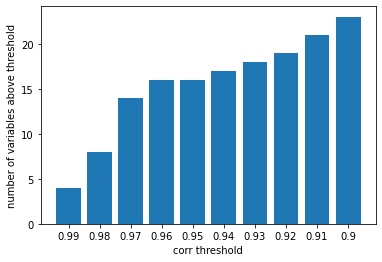

In [82]:
thresholds = [str(x) for x in thresholds]
plt.bar(thresholds, corr_cols_len)
plt.xlabel('corr threshold')
plt.ylabel('number of variables above threshold')

In [83]:
cols = [col for col in c.columns if any(c[col] > .96) ]
corr = X.corr().abs()

In [84]:
len(cols)

16

In [101]:
corr.drop(axis=1, index=cols, inplace=True)

In [102]:
corr.shape

(67, 83)

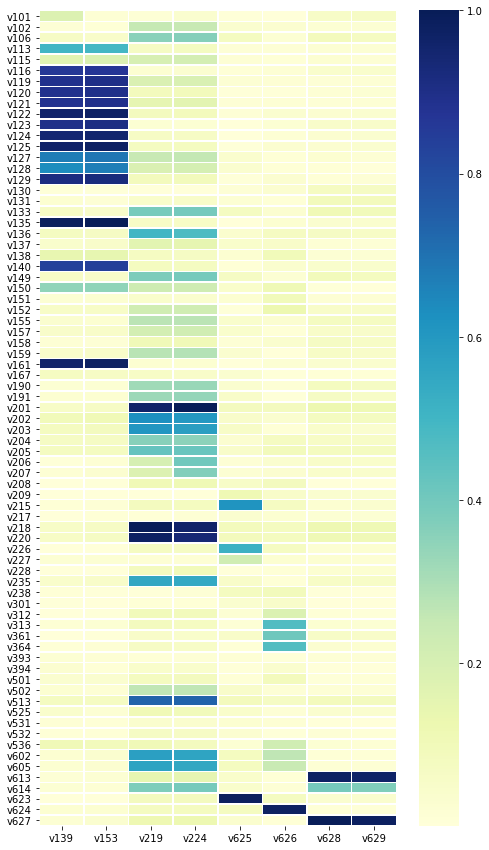

In [9]:
import matplotlib.pylab as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,15))
sns.heatmap(corr[cols], linewidth=0.5, cmap="YlGnBu", ax=ax)
plt.show()

In [38]:
fig.savefig('corr_matrix.pdf')

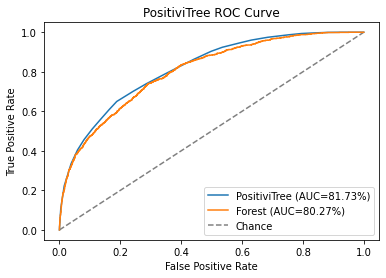

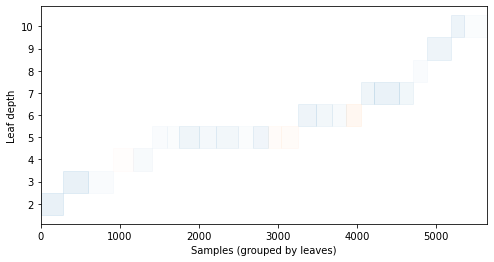

End.


In [4]:
ptree = PositiviTree(X_df, a,
                     violation_cutoff=0.1, consistency_cutoff=0.6,
                     n_consistency_tests=200, relative_violations=False,
                     # search_kws={"n_iter": 200},
                     dtc_kws={"criterion": "entropy"},
                     rfc_kws={"max_features": "auto"}
                     )

flagged_leaves = ptree._flag_out_leaves()
violating_samples = ptree._get_violating_samples_mask()
counts = ptree._count_violating_samples_in_forest(normalize=True)
tree_json_full = ptree.export_tree()
scores = ptree.evaluate_fit(plot_roc=True)

ax = visualize_leaves_static(ptree)
visualization_data = visualize_leaves_interactive(ptree, output_path='results/positivitree_viz_full.html')

print("End.")

In [5]:
print(len(X_df[violating_samples])/len(X_df))

leaves = ptree.export_leaves(extract_rules_kws={"clause_joiner": None})
violating_leaves = [leaf for leaf in leaves if leaf['is_violating']]

q_set = set()
for leaf in violating_leaves:
    for q in leaf['query']:
        print(q)
        q_set.add(q.feature_name)
    print('\n')

print(len(q_set))
print(q_set)

0.08833421844574262
(v235<=0.5)
(v513_2<=0.5)
(v137<=0.5)


(v235<=0.5)
(v513_2<=0.5)
(v137>0.5)
(v159<=0.5)
(v116_23<=0.5)


5
{'v116_23', 'v137', 'v235', 'v513_2', 'v159'}


In [7]:
# "Index last child prior to maternity-health (calendar)" == "No prior child"
# "Cohabitation duration (grouped)" == "Never married"
# "Number of children 5 and under in household (de jure)" == 0
# "Frequency of watching television" == "Not at all"

In [72]:
import json
with open('results/overall_full.json', 'w') as fp:
    fp.write(str(tree_json_full))

In [9]:
ax.get_figure().savefig('results/positivitree_overall.pdf')

In [153]:
X_df_ = X_df[X_df['v312_3'] == 0]
y_ = y[X_df['v312_3'] == 0]
a_ = a[X_df['v312_3'] == 0]

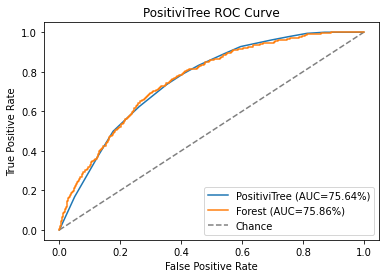

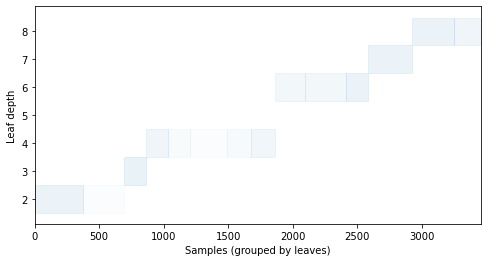

End.


In [111]:
ptree = PositiviTree(X_df_, a_,
                     violation_cutoff=0.1, consistency_cutoff=0.6,
                     n_consistency_tests=200, relative_violations=False,
                     # search_kws={"n_iter": 200},
                     dtc_kws={"criterion": "entropy"},
                     rfc_kws={"max_features": "auto"}
                     )

flagged_leaves = ptree._flag_out_leaves()
violating_samples_0 = ptree._get_violating_samples_mask()
counts = ptree._count_violating_samples_in_forest(normalize=True)
tree_json_0 = ptree.export_tree()
scores = ptree.evaluate_fit(plot_roc=True)

ax = visualize_leaves_static(ptree)
visualization_data = visualize_leaves_interactive(ptree, output_path='results/positivitree_viz_0.html')

print("End.")

In [113]:
print(len(X_df_[violating_samples_0])/len(X_df_))

leaves = ptree.export_leaves(extract_rules_kws={"clause_joiner": None})
violating_leaves = [leaf for leaf in leaves if leaf['is_violating']]

q_set = set()
for leaf in violating_leaves:
    for q in leaf['query']:
        print(q)
        q_set.add(q.feature_name)
    print('\n')
    
print(len(q_set))
print(q_set)

0.10850694444444445
(v235<=0.5)
(v513_0>0.5)


2
{'v513_0', 'v235'}


In [ ]:
# "Index last child prior to maternity-health (calendar)" == "No prior child"
# "Current marital status" == "Never in union"
# "Cohabitation duration (grouped)" > "Never married"  -> Basically Married for some length of time
# "Time since last menstrual period" <= Xweeks ago
# "Current marital status" > "Never in union" -> Basically Married


In [73]:
import json
with open('results/strata0_full.json', 'w') as fp:
    fp.write(str(tree_json_0))

In [9]:
ax.get_figure().savefig('results/positivitree_curr_0.pdf')

In [21]:
X_df_ = X_df[X_df['v312_3'] == 1]
y_ = y[X_df['v312_3'] == 1]
a_ = a[X_df['v312_3'] == 1]

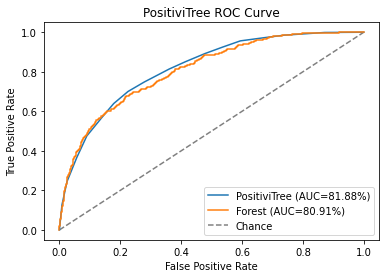

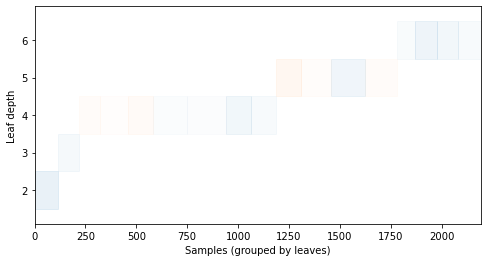

End.


In [22]:
ptree = PositiviTree(X_df_, a_,
                     violation_cutoff=0.1, consistency_cutoff=0.6,
                     n_consistency_tests=200, relative_violations=False,
                     # search_kws={"n_iter": 200},
                     dtc_kws={"criterion": "entropy"},
                     rfc_kws={"max_features": "auto"}
                     )

flagged_leaves = ptree._flag_out_leaves()
violating_samples_1 = ptree._get_violating_samples_mask()
counts = ptree._count_violating_samples_in_forest(normalize=True)
tree_json_1 = ptree.export_tree()
scores = ptree.evaluate_fit(plot_roc=True)

ax = visualize_leaves_static(ptree)
visualization_data = visualize_leaves_interactive(ptree, output_path='results/positivitree_viz_1.html')

print("End.")

In [23]:
print(len(X_df_[violating_samples_1])/len(X_df_))

leaves = ptree.export_leaves(extract_rules_kws={"clause_joiner": None})
violating_leaves = [leaf for leaf in leaves if leaf['is_violating']]

q_set = set()
for leaf in violating_leaves:
    for q in leaf['query']:
        print(q)
        q_set.add(q.feature_name)
    print("q_end")

print(len(q_set))
print(q_set)

0.07797537619699042
(v208>0.5)
(v235<=1.0)
(v513_2<=0.5)
(v159<=0.5)
q_end
4
{'v208', 'v235', 'v513_2', 'v159'}


In [21]:
# "Births in last five years" > 0
# "Index last child prior to maternity-health (calendar)" <= 1
# "Cohabitation duration (grouped)"_5-9 == 0. -> is not (5-9)
# "Frequency of watching television" == "Not at all"
# "Wealth index factor score (5 decimals)" > -33375.5

# '(v208>0.5) AND (v235<=1.0) AND (v513_2<=0.5) AND (v159<=0.5) AND (v191>-33375.5)

In [ ]:
plt.hist(X_df['v191'])

In [152]:
import json
with open('results/strata1_full.json', 'w') as fp:
    fp.write(str(tree_json_1))

In [23]:
ax.get_figure().savefig('results/positivitree_curr_1.pdf')

In [24]:
from matplotlib_venn import venn2, venn3

In [154]:
violating_samples_ptree = X_df_[violating_samples_0]

In [155]:
len(violating_samples_ptree)

375

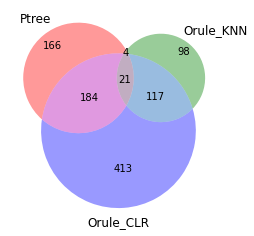

In [230]:
set1 = set(violating_samples_ptree.index)
set2 = set(knn_violating_index)
set3 = set(clr_violating_index)

fig, ax = plt.subplots()
venn3([set1, set2, set3], ('Ptree', 'Orule_KNN', 'Orule_CLR'), ax=ax)

In [208]:
ax.get_figure().savefig('results/venn_curr0_1.pdf')

In [124]:
overlap_indices = set(X_df_.index).difference(set(violating_samples_ptree.index))

In [ ]:
X_overlap = pd.merge(support, propensity, how='inner')
print(len(X_overlap) / len(X_df))

In [126]:
1 - len(overlap_indices)/len(X_df_)

0.10850694444444442

In [119]:
y = y_.loc[overlap_indices]
a = a_.loc[overlap_indices]
X = X_df_.loc[overlap_indices]

In [120]:
X.shape

(3081, 256)

In [233]:
from causallib.estimation import IPW
from causallib.evaluation import PropensityEvaluator

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV

In [234]:
strartify_by = (a*2) + y
X_train, X_test, a_train, a_test, y_train, y_test = train_test_split(
    X_df, a, y, 
    train_size=0.7,
    test_size=0.3,
    shuffle=True, 
    random_state=1, 
    stratify=strartify_by
)

print(X_test.shape)

(1695, 256)


In [235]:
base_estimator = LogisticRegression(
    penalty="l2", 
    max_iter=2000,
    class_weight="balanced",
    random_state=2,
    solver='lbfgs',
    C=1
)
learner = CalibratedClassifierCV(base_estimator=base_estimator, cv=5, method='sigmoid')

ipw = IPW(make_pipeline(StandardScaler(), learner), use_stabilized=True)
ipw.fit(X_train, a_train)

IPW(truncate_eps=None, use_stabilized=True,
    learner=Pipeline(steps=[('standardscaler', StandardScaler()),
                ('calibratedclassifiercv',
                 CalibratedClassifierCV(base_estimator=LogisticRegression(C=1,
                                                                          class_weight='balanced',
                                                                          max_iter=2000,
                                                                          random_state=2),
                                        cv=5))]))

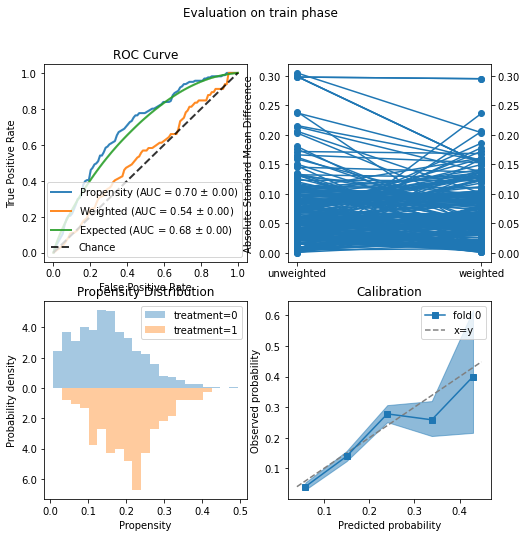

In [221]:
plots=["roc_curve", "covariate_balance_slope", "weight_distribution", "calibration"]
evaluator = PropensityEvaluator(ipw)
evaluations = evaluator.evaluate_simple(X_test.astype(float), a_test, y_test, plots=plots)

fig = evaluations.plots['covariate_balance_slope'].get_figure().set_size_inches(8, 8) 

In [298]:
import matplotlib
matplotlib.rcParams['font.family']

['sans-serif']

In [236]:
from sklearn.utils import resample

import warnings
warnings.filterwarnings("ignore")

effects = []
for i in range(2000):
    X_r, a_r, y_r = resample(X_test, a_test, y_test, n_samples=None, random_state=i)
    
    X_r = X_r.reset_index(drop=True)
    a_r = a_r.reset_index(drop=True)
    y_r = y_r.reset_index(drop=True)
    
    potential_outcomes = ipw.estimate_population_outcome(X_r, a_r, y_r)
    causal_effect = ipw.estimate_effect(potential_outcomes[1], potential_outcomes[0])
    effects.append(causal_effect)

median = np.median(effects)
lower = np.percentile(effects, 2.5)
upper = np.percentile(effects, 97.5)
print(median, lower, upper)

0.07620512426801022 0.008471597522336158 0.18250445496120016


In [223]:
evaluations.plots['weight_distribution'].get_figure().savefig('results/curr0.pdf')

In [224]:
# X_df, a, y = get_data()

X_df_, a_, y_ = get_data()

X_df = X_df_[X_df_['v312_3'] == 0]
y = y_[X_df_['v312_3'] == 0]
a = a_[X_df_['v312_3'] == 0]

X_df.shape, y.shape, a.shape

((3456, 256), (3456,), (3456,))

In [227]:
print(len(X_df)/len(X_df_))
print(1 - (len(X_df)/len(X_df_)))

0.6117896972915561
0.3882103027084439


In [229]:
# # support = X_df[(~X_df["v129_97"].astype(bool) & ~X_df["v140_7"].astype(bool) & (X_df["v201"] > 0.500) & X_df["v513_2"].astype(bool) & ~X_df["v513_3"].astype(bool) & ~X_df["v602_4"].astype(bool))| (X_df["v129_97"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v202"] <= 2.500) & (X_df["v208"] <= 1.500) & ~X_df["v602_4"].astype(bool))| (~X_df["v129_97"].astype(bool) & ~X_df["v140_7"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v235"] > 2.500) & ~X_df["v513_2"].astype(bool) & ~X_df["v602_4"].astype(bool))| (~X_df["v129_97"].astype(bool) & ~X_df["v140_7"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v208"] <= 1.500) & (X_df["v235"] <= 2.500) & ~X_df["v312_3"].astype(bool) & ~X_df["v513_2"].astype(bool) & X_df["v513_3"].astype(bool))| (~X_df["v129_97"].astype(bool) & ~X_df["v140_7"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v208"] <= 1.500) & (X_df["v235"] <= 2.500) & (X_df["v235"] > 0.500) & X_df["v312_3"].astype(bool) & ~X_df["v602_4"].astype(bool))| (~X_df["v129_97"].astype(bool) & ~X_df["v140_7"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v208"] > 0.500) & (X_df["v235"] > 2.500) & ~X_df["v602_4"].astype(bool))| (~X_df["v129_97"].astype(bool) & ~X_df["v140_7"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v202"] <= 2.500) & (X_df["v208"] <= 1.500) & (X_df["v235"] <= 2.500) & (X_df["v235"] > 1.500) & ~X_df["v312_3"].astype(bool) & ~X_df["v513_3"].astype(bool))| (~X_df["v129_97"].astype(bool) & ~X_df["v140_7"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v235"] <= 0.500) & ~X_df["v513_3"].astype(bool) & ~X_df["v602_4"].astype(bool))| (~X_df["v129_97"].astype(bool) & ~X_df["v140_7"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v202"] <= 2.500) & (X_df["v208"] <= 1.500) & (X_df["v235"] <= 1.000) & (X_df["v235"] > 0.500) & ~X_df["v312_3"].astype(bool) & ~X_df["v513_3"].astype(bool) & ~X_df["v602_4"].astype(bool))| (~X_df["v129_97"].astype(bool) & ~X_df["v140_7"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v202"] > 2.500) & (X_df["v208"] <= 1.500) & (X_df["v235"] <= 2.500) & ~X_df["v312_3"].astype(bool) & ~X_df["v513_2"].astype(bool) & ~X_df["v513_3"].astype(bool) & ~X_df["v602_4"].astype(bool))| (~X_df["v129_97"].astype(bool) & ~X_df["v140_7"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v202"] <= 2.500) & (X_df["v208"] <= 0.500) & ~X_df["v513_2"].astype(bool) & ~X_df["v513_3"].astype(bool) & ~X_df["v602_4"].astype(bool))]


# # clr_propensity = X_df[((X_df["v133"] > 12.500) & (X_df["v137"] <= 1.500) & (X_df["v152"] <= 57.500) & (X_df["v191"] <= 95263.500) & (X_df["v235"] > 0.500))| ((X_df["v133"] <= 12.500) & (X_df["v152"] <= 45.500) & (X_df["v191"] <= 95263.500) & (X_df["v235"] <= 0.500) & X_df["v312_3"].astype(bool))| ((X_df["v133"] <= 12.500) & (X_df["v137"] <= 1.500) & (X_df["v152"] <= 57.500) & (X_df["v191"] > 95263.500) & (X_df["v235"] > 0.500))| ((X_df["v133"] <= 12.500) & (X_df["v137"] <= 1.500) & (X_df["v152"] <= 45.500) & (X_df["v167"] <= 2.500) & (X_df["v191"] <= 95263.500) & (X_df["v235"] <= 0.500) & ~X_df["v312_3"].astype(bool))| ((X_df["v133"] <= 12.500) & (X_df["v137"] > 1.500) & (X_df["v152"] <= 45.500) & (X_df["v191"] <= 95263.500) & (X_df["v235"] > 0.500))| ((X_df["v133"] <= 12.500) & (X_df["v137"] > 1.500) & (X_df["v152"] <= 75.500) & (X_df["v152"] > 57.500) & (X_df["v235"] > 0.500))| ((X_df["v133"] <= 12.500) & (X_df["v137"] <= 1.500) & (X_df["v191"] <= 131083.500) & (X_df["v235"] > 0.500))| ((X_df["v133"] <= 12.500) & (X_df["v191"] > 131083.500) & X_df["v312_3"].astype(bool))| ((X_df["v133"] <= 12.500) & (X_df["v137"] > 1.500) & (X_df["v152"] <= 75.500) & (X_df["v167"] <= 2.500) & (X_df["v191"] <= 166983.000) & (X_df["v191"] > 95263.500) & (X_df["v235"] > 0.500))| ((X_df["v152"] <= 57.500) & (X_df["v152"] > 45.500) & (X_df["v191"] <= 131083.500) & (X_df["v235"] > 0.500))]

# # knn_propensity = X_df[((X_df["v191"] <= 290545.000) & (X_df["v191"] > -188796.000))]


# support = X_df[(X_df["v129_97"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v202"] <= 2.500) & (X_df["v208"] <= 1.500) & ~X_df["v602_4"].astype(bool))| (~X_df["v129_97"].astype(bool) & ~X_df["v140_7"].astype(bool) & (X_df["v201"] > 0.500) & ~X_df["v513_3"].astype(bool) & ~X_df["v602_4"].astype(bool))| (~X_df["v129_97"].astype(bool) & ~X_df["v140_7"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v235"] > 0.500) & ~X_df["v513_2"].astype(bool) & X_df["v513_3"].astype(bool))]

# clr_propensity = X_df[((X_df["v152"] <= 49.500) & (X_df["v191"] <= 166983.000) & (X_df["v226"] <= 996.000) & X_df["v312_3"].astype(bool))| ((X_df["v133"] <= 12.500) & (X_df["v137"] > 1.500) & (X_df["v152"] <= 75.500) & (X_df["v191"] <= 166983.000) & (X_df["v226"] <= 996.000) & (X_df["v235"] > 0.500) & ~X_df["v312_3"].astype(bool))| ((X_df["v133"] <= 12.500) & (X_df["v137"] <= 1.500) & (X_df["v152"] <= 57.500) & (X_df["v191"] > 131083.500) & (X_df["v205"] <= 0.500) & (X_df["v226"] <= 996.000) & (X_df["v235"] > 0.500))| ((X_df["v133"] <= 12.500) & (X_df["v137"] <= 1.500) & (X_df["v152"] <= 49.500) & (X_df["v205"] > 0.500) & (X_df["v226"] <= 996.000))| ((X_df["v133"] <= 12.500) & (X_df["v137"] <= 1.500) & (X_df["v191"] <= 131083.500) & (X_df["v226"] <= 996.000) & (X_df["v235"] > 0.500))| ((X_df["v133"] <= 12.500) & (X_df["v137"] <= 1.500) & (X_df["v152"] <= 49.500) & (X_df["v167"] <= 2.500) & (X_df["v191"] <= 131083.500) & (X_df["v226"] <= 996.000) & (X_df["v235"] <= 0.500) & ~X_df["v312_3"].astype(bool))| ((X_df["v137"] <= 1.500) & (X_df["v152"] <= 57.500) & (X_df["v191"] <= 131083.500) & (X_df["v226"] <= 996.000) & (X_df["v235"] > 0.500) & ~X_df["v312_3"].astype(bool))| ((X_df["v133"] <= 12.500) & (X_df["v137"] > 1.500) & (X_df["v152"] <= 75.500) & (X_df["v191"] <= 166983.000) & (X_df["v235"] > 0.500) & X_df["v312_3"].astype(bool))]


# knn_propensity = X_df[((X_df["v191"] <= 290545.000) & (X_df["v191"] > -188796.000))]


############

# support = X_df[((X_df["v201"] > 0.500) & (X_df["v208"] <= 1.500) & (X_df["v208"] > 0.500) & (X_df["v235"] <= 1.000) & (X_df["v238"] > 0.500) & X_df["v513_2"].astype(bool) & (X_df["v531"] > 13.500))| (X_df["v150_2"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v208"] > 0.500) & (X_df["v235"] <= 1.000) & (X_df["v238"] > 0.500) & X_df["v513_2"].astype(bool) & (X_df["v531"] > 13.500))| ((X_df["v201"] > 0.500) & (X_df["v208"] <= 1.500) & (X_df["v208"] > 0.500) & (X_df["v235"] <= 1.000) & X_df["v513_2"].astype(bool) & (X_df["v531"] > 13.500))| ((X_df["v191"] <= 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] <= 1.500) & (X_df["v235"] > 1.500) & (X_df["v238"] <= 0.500) & (X_df["v531"] > 13.500))| (~X_df["v101_5"].astype(bool) & X_df["v150_2"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v208"] > 1.500) & ~X_df["v513_2"].astype(bool) & (X_df["v531"] > 13.500))| (~X_df["v101_5"].astype(bool) & (X_df["v191"] <= 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] <= 0.500) & (X_df["v238"] <= 0.500) & (X_df["v531"] > 13.500))| ((X_df["v191"] <= 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] > 0.500) & (X_df["v235"] <= 1.000) & (X_df["v238"] > 0.500) & ~X_df["v513_2"].astype(bool) & (X_df["v531"] <= 13.500))| (~X_df["v101_5"].astype(bool) & (X_df["v191"] <= 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] > 0.500) & (X_df["v235"] > 1.500) & (X_df["v238"] > 0.500) & X_df["v513_2"].astype(bool))| (~X_df["v101_5"].astype(bool) & (X_df["v191"] <= 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] <= 1.500) & (X_df["v208"] > 0.500) & (X_df["v235"] > 1.500) & (X_df["v238"] > 0.500) & ~X_df["v513_2"].astype(bool))| (~X_df["v101_5"].astype(bool) & ~X_df["v150_2"].astype(bool) & (X_df["v191"] <= 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] > 1.500) & (X_df["v238"] > 0.500) & ~X_df["v513_2"].astype(bool) & (X_df["v531"] > 13.500))| ((X_df["v201"] > 0.500) & (X_df["v238"] <= 0.500) & (X_df["v531"] <= 13.500))| (~X_df["v101_5"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v208"] <= 1.500) & (X_df["v208"] > 0.500) & (X_df["v235"] > 1.500) & (X_df["v238"] <= 0.500) & (X_df["v531"] > 13.500))| (X_df["v101_5"].astype(bool) & (X_df["v191"] <= 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] > 0.500) & (X_df["v235"] > 1.500) & (X_df["v238"] > 0.500) & ~X_df["v513_2"].astype(bool))| (X_df["v101_5"].astype(bool) & (X_df["v191"] <= 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] > 0.500) & (X_df["v235"] > 1.500) & (X_df["v238"] > 0.500) & X_df["v513_2"].astype(bool) & (X_df["v531"] > 13.500))| ((X_df["v191"] > 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] <= 1.500) & (X_df["v238"] <= 0.500) & (X_df["v531"] > 13.500))| ((X_df["v201"] > 0.500) & (X_df["v208"] <= 1.500) & (X_df["v235"] <= 1.000) & (X_df["v238"] <= 0.500) & (X_df["v531"] > 13.500))| (X_df["v101_5"].astype(bool) & (X_df["v191"] <= 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] <= 1.500) & (X_df["v238"] <= 0.500) & (X_df["v531"] > 13.500))]


# clr_propensity = X_df[((X_df["v137"] <= 2.500) & (X_df["v208"] <= 1.500))| ((X_df["v115"] <= 997.500) & (X_df["v137"] <= 2.500) & (X_df["v208"] <= 2.500) & (X_df["v525"] <= 15.500))| (X_df["v120_1"].astype(bool) & (X_df["v137"] <= 2.500) & (X_df["v202"] > 1.500))]

# knn_propensity = X_df[((X_df["v208"] <= 2.500))]


# support = X_df[((X_df["v201"] > 0.500) & (X_df["v208"] > 0.500) & (X_df["v235"] <= 1.000) & (X_df["v238"] > 0.500) & X_df["v513_2"].astype(bool) & (X_df["v531"] > 13.500))| (~X_df["v101_5"].astype(bool) & X_df["v150_2"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v208"] > 1.500) & ~X_df["v513_2"].astype(bool) & (X_df["v531"] > 13.500))| ((X_df["v191"] <= 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] > 0.500) & ~X_df["v513_2"].astype(bool) & (X_df["v531"] <= 13.500))| ((X_df["v201"] > 0.500) & (X_df["v208"] <= 1.500) & (X_df["v238"] <= 0.500))| (~X_df["v101_5"].astype(bool) & (X_df["v191"] <= 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] > 0.500) & (X_df["v235"] > 1.500) & (X_df["v238"] > 0.500) & X_df["v513_2"].astype(bool))| (~X_df["v101_5"].astype(bool) & (X_df["v191"] <= 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] <= 1.500) & (X_df["v208"] > 0.500) & (X_df["v235"] > 1.500) & (X_df["v238"] > 0.500) & ~X_df["v513_2"].astype(bool) & (X_df["v531"] > 13.500))| (X_df["v101_5"].astype(bool) & (X_df["v191"] <= 156046.000) & (X_df["v201"] > 0.500) & (X_df["v208"] > 0.500) & (X_df["v235"] > 1.500) & (X_df["v238"] > 0.500) & (X_df["v531"] > 13.500))| (~X_df["v101_5"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v208"] > 1.500) & ~X_df["v513_2"].astype(bool) & (X_df["v531"] > 13.500))]

# clr_propensity = X_df[((X_df["v137"] <= 2.500) & (X_df["v226"] <= 503.500) & (X_df["v235"] > 1.500))| ((X_df["v137"] <= 2.500) & (X_df["v208"] <= 1.500))]

# knn_propensity = X_df[((X_df["v208"] <= 2.500))]


############

# support = X_df[(~X_df["v119_7"].astype(bool) & ~X_df["v122_7"].astype(bool) & ~X_df["v128_22"].astype(bool) & (X_df["v149"] > 2.500) & (X_df["v235"] > 0.500) & ~X_df["v513_2"].astype(bool) & (X_df["v525"] > 9.500) & (X_df["v531"] > 9.500) & ~X_df["v602_4"].astype(bool) & (X_df["v613"] > 2.500))| (~X_df["v119_7"].astype(bool) & ~X_df["v122_7"].astype(bool) & ~X_df["v128_22"].astype(bool) & X_df["v513_2"].astype(bool) & ~X_df["v513_3"].astype(bool) & (X_df["v525"] > 9.500) & (X_df["v531"] > 9.500) & ~X_df["v602_4"].astype(bool))| (~X_df["v101_7"].astype(bool) & X_df["v119_7"].astype(bool) & ~X_df["v128_22"].astype(bool) & (X_df["v202"] <= 2.500) & (X_df["v525"] > 9.500) & (X_df["v531"] > 9.500) & ~X_df["v602_4"].astype(bool))| (~X_df["v119_7"].astype(bool) & ~X_df["v122_7"].astype(bool) & ~X_df["v128_22"].astype(bool) & (X_df["v149"] <= 2.500) & ~X_df["v513_2"].astype(bool) & (X_df["v525"] > 9.500) & (X_df["v531"] > 9.500) & ~X_df["v602_4"].astype(bool) & (X_df["v613"] > 2.500))| (~X_df["v101_7"].astype(bool) & ~X_df["v119_7"].astype(bool) & ~X_df["v122_7"].astype(bool) & ~X_df["v128_22"].astype(bool) & (X_df["v202"] <= 2.500) & (X_df["v235"] <= 2.500) & (X_df["v525"] > 9.500) & (X_df["v531"] > 9.500) & X_df["v602_4"].astype(bool) & (X_df["v613"] > 2.500))| (~X_df["v101_7"].astype(bool) & ~X_df["v119_7"].astype(bool) & ~X_df["v122_7"].astype(bool) & X_df["v128_22"].astype(bool) & (X_df["v235"] <= 2.500) & (X_df["v525"] > 9.500) & (X_df["v531"] > 9.500) & ~X_df["v602_4"].astype(bool))| (~X_df["v119_7"].astype(bool) & ~X_df["v122_7"].astype(bool) & ~X_df["v513_2"].astype(bool) & (X_df["v613"] <= 2.500))]


# clr_propensity = X_df[((X_df["v149"] > 3.500) & (X_df["v152"] <= 55.500) & (X_df["v191"] <= 172282.000) & (X_df["v226"] <= 545.000) & ~X_df["v513_0"].astype(bool))| ((X_df["v133"] <= 13.500) & (X_df["v152"] <= 64.500) & (X_df["v191"] <= 268974.000) & (X_df["v226"] <= 533.500) & (X_df["v235"] > 0.500) & ~X_df["v501_0"].astype(bool) & ~X_df["v513_0"].astype(bool) & (X_df["v613"] <= 3.500))| ((X_df["v136"] > 6.500) & (X_df["v149"] <= 2.500) & (X_df["v152"] <= 64.500))| ((X_df["v149"] <= 3.500) & (X_df["v152"] <= 55.500) & (X_df["v191"] <= 268974.000) & (X_df["v226"] <= 545.000))]

# knn_propensity = X_df[((X_df["v191"] <= 123525.000) & (X_df["v191"] > -152637.000) & (X_df["v227"] <= 7.000))| ((X_df["v191"] <= 257663.500) & (X_df["v191"] > 132820.000))]


support = X_df[(~X_df["v119_7"].astype(bool) & ~X_df["v122_7"].astype(bool) & (X_df["v525"] > 9.500) & (X_df["v531"] > 9.500))| (~X_df["v101_7"].astype(bool) & X_df["v119_7"].astype(bool) & X_df["v122_7"].astype(bool) & ~X_df["v128_22"].astype(bool) & (X_df["v202"] <= 2.500) & ~X_df["v513_3"].astype(bool) & (X_df["v525"] > 9.500) & (X_df["v531"] > 9.500) & ~X_df["v602_4"].astype(bool))]


clr_propensity = X_df[((X_df["v106"] <= 2.500) & (X_df["v106"] > 1.500) & (X_df["v149"] > 2.500) & ~X_df["v150_3"].astype(bool) & (X_df["v152"] <= 55.500) & (X_df["v191"] <= 169349.500) & (X_df["v215"] <= 994.500) & (X_df["v226"] <= 545.000) & ~X_df["v602_3"].astype(bool))| ((X_df["v133"] <= 10.500) & ~X_df["v151_2"].astype(bool) & (X_df["v152"] <= 64.500) & (X_df["v226"] <= 545.000))| ((X_df["v106"] <= 2.500) & (X_df["v152"] <= 55.500) & (X_df["v226"] <= 545.000) & X_df["v602_3"].astype(bool))| ((X_df["v149"] <= 2.500) & (X_df["v152"] <= 55.500) & (X_df["v191"] <= 169349.500) & (X_df["v226"] <= 545.000))| ((X_df["v106"] > 2.500) & ~X_df["v150_3"].astype(bool) & (X_df["v152"] <= 55.500) & (X_df["v191"] <= 169349.500) & (X_df["v226"] <= 545.000))]

knn_propensity = X_df[((X_df["v191"] <= 123525.000) & (X_df["v191"] > -152637.000) & (X_df["v227"] <= 7.000))| ((X_df["v191"] <= 257663.500) & (X_df["v191"] > 132820.000))]


propensity = knn_propensity

intersection = set(list(support.index)).intersection(set(list(propensity.index)))
a_overlap = a.loc[list(intersection)].reset_index()
y_overlap = y.loc[list(intersection)].reset_index()

print(len(support)/len(X_df))
print(len(propensity)/len(X_df))

X_overlap = pd.merge(support, propensity, how='inner')
print(len(X_overlap) / len(X_df))

# clr_violating_index = list(set(X_df.index) - intersection)

knn_violating_index = list(set(X_df.index) - intersection)

0.9916087962962963
0.9383680555555556
0.9305555555555556


In [173]:
X = pd.DataFrame(X_overlap.values)
y = pd.Series(y_overlap['outcome'].values)
a = pd.Series(a_overlap['treatment'].values)

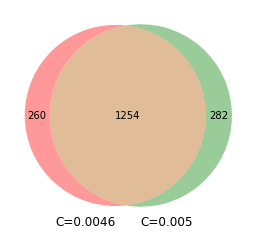

In [238]:
support = X_df[(X_df["v123_7"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v202"] <= 2.500) & (X_df["v208"] <= 1.500) & ~X_df["v602_4"].astype(bool))| (~X_df["v113_97"].astype(bool) & ~X_df["v123_7"].astype(bool) & (X_df["v201"] > 0.500) & ~X_df["v513_3"].astype(bool) & ~X_df["v602_4"].astype(bool))| (~X_df["v113_97"].astype(bool) & ~X_df["v123_7"].astype(bool) & (X_df["v201"] > 0.500) & (X_df["v235"] > 0.500) & ~X_df["v513_2"].astype(bool) & X_df["v513_3"].astype(bool))]

propensity = X_df[((X_df["v137"] <= 3.500) & (X_df["v149"] <= 2.500) & (X_df["v152"] <= 34.500) & (X_df["v191"] <= 99419.500) & (X_df["v226"] <= 996.000))| ((X_df["v152"] <= 64.500) & (X_df["v208"] <= 0.500) & ~X_df["v536_3"].astype(bool))| ((X_df["v133"] <= 13.000) & (X_df["v137"] <= 3.500) & (X_df["v152"] <= 68.500) & (X_df["v191"] <= 99419.500) & (X_df["v208"] <= 1.500) & (X_df["v226"] <= 996.000) & (X_df["v235"] > 0.500))| ((X_df["v133"] <= 12.500) & (X_df["v152"] <= 34.500) & (X_df["v226"] <= 996.000) & X_df["v312_3"].astype(bool))| ((X_df["v152"] <= 34.500) & (X_df["v191"] <= 99419.500) & (X_df["v208"] <= 1.500) & X_df["v312_3"].astype(bool))| ((X_df["v106"] <= 2.500) & (X_df["v133"] <= 13.000) & (X_df["v137"] <= 3.500) & (X_df["v149"] <= 2.500) & (X_df["v152"] <= 68.500) & (X_df["v152"] > 34.500) & (X_df["v191"] <= 99419.500) & (X_df["v226"] <= 996.000) & (X_df["v235"] > 0.500) & X_df["v536_3"].astype(bool))| ((X_df["v137"] <= 3.500) & (X_df["v235"] > 0.500) & X_df["v312_3"].astype(bool) & ~X_df["v536_3"].astype(bool))| ((X_df["v106"] <= 1.500) & (X_df["v133"] <= 13.000) & (X_df["v137"] <= 3.500) & (X_df["v149"] <= 2.500) & (X_df["v152"] <= 64.500) & (X_df["v191"] <= 99419.500) & (X_df["v208"] > 0.500) & (X_df["v226"] <= 996.000) & X_df["v312_3"].astype(bool) & ~X_df["v536_3"].astype(bool))| ((X_df["v152"] <= 34.500) & (X_df["v191"] <= 99419.500) & (X_df["v226"] <= 996.000) & (X_df["v235"] > 0.500) & ~X_df["v536_3"].astype(bool))| ((X_df["v133"] <= 12.500) & (X_df["v152"] <= 34.500) & (X_df["v208"] <= 0.500))| ((X_df["v152"] <= 68.500) & (X_df["v208"] <= 0.500) & X_df["v312_3"].astype(bool))| ((X_df["v106"] > 2.500) & (X_df["v133"] <= 13.000) & (X_df["v137"] <= 3.500) & (X_df["v152"] <= 64.500) & (X_df["v152"] > 34.500) & (X_df["v208"] > 0.500) & (X_df["v226"] <= 996.000) & (X_df["v235"] > 0.500) & ~X_df["v312_3"].astype(bool) & ~X_df["v536_3"].astype(bool))| ((X_df["v149"] <= 2.500) & (X_df["v152"] <= 68.500) & (X_df["v235"] > 0.500) & X_df["v312_3"].astype(bool))| ((X_df["v149"] <= 2.500) & (X_df["v152"] <= 34.500) & (X_df["v208"] <= 1.500) & (X_df["v226"] <= 996.000))| ((X_df["v149"] <= 2.500) & (X_df["v208"] <= 0.500) & ~X_df["v312_3"].astype(bool))| ((X_df["v106"] <= 2.500) & (X_df["v133"] <= 13.000) & (X_df["v137"] <= 3.500) & (X_df["v149"] <= 2.500) & (X_df["v152"] <= 64.500) & (X_df["v226"] <= 996.000) & (X_df["v235"] > 0.500) & ~X_df["v312_3"].astype(bool) & ~X_df["v536_3"].astype(bool))]


propensity2 = X_df[((X_df["v137"] <= 2.500) & (X_df["v149"] <= 3.500) & (X_df["v152"] <= 61.500) & (X_df["v191"] <= 176527.500) & (X_df["v235"] > 0.500))| ((X_df["v106"] > 0.500) & ~X_df["v129_33"].astype(bool) & (X_df["v133"] > 1.000) & (X_df["v137"] <= 2.500) & (X_df["v152"] <= 61.500) & (X_df["v191"] > 68857.000) & (X_df["v235"] > 0.500) & (X_df["v614"] <= 3.500) & X_df["v624_4"].astype(bool))| (~X_df["v129_33"].astype(bool) & (X_df["v133"] > 1.000) & (X_df["v137"] <= 2.500) & (X_df["v149"] <= 3.500) & (X_df["v152"] <= 36.500) & (X_df["v191"] <= 176527.500) & (X_df["v235"] <= 0.500) & ~X_df["v312_3"].astype(bool) & (X_df["v614"] <= 3.500))| (~X_df["v129_33"].astype(bool) & (X_df["v137"] <= 2.500) & (X_df["v149"] <= 3.500) & (X_df["v152"] <= 75.500) & (X_df["v152"] > 49.500) & (X_df["v191"] <= 68857.000) & (X_df["v235"] > 0.500) & ~X_df["v312_3"].astype(bool))| ((X_df["v152"] <= 75.500) & (X_df["v191"] <= 68857.000) & (X_df["v235"] > 0.500) & X_df["v312_3"].astype(bool))| ((X_df["v152"] <= 36.500) & (X_df["v235"] > 0.500) & X_df["v312_3"].astype(bool))| ((X_df["v133"] <= 1.000) & (X_df["v152"] <= 49.500) & X_df["v624_4"].astype(bool))| ((X_df["v137"] <= 2.500) & (X_df["v235"] > 0.500) & X_df["v312_3"].astype(bool) & (X_df["v614"] <= 3.500))| ((X_df["v106"] > 0.500) & ~X_df["v129_33"].astype(bool) & (X_df["v133"] > 1.000) & (X_df["v137"] <= 2.500) & (X_df["v149"] > 3.500) & (X_df["v152"] <= 61.500) & (X_df["v152"] > 36.500) & (X_df["v191"] <= 176527.500) & (X_df["v235"] > 0.500) & X_df["v624_4"].astype(bool))| (X_df["v129_33"].astype(bool) & (X_df["v235"] > 0.500) & ~X_df["v624_4"].astype(bool))| (~X_df["v129_33"].astype(bool) & (X_df["v152"] <= 49.500) & X_df["v312_3"].astype(bool) & (X_df["v614"] <= 3.500))| ((X_df["v106"] > 0.500) & ~X_df["v129_33"].astype(bool) & (X_df["v133"] > 1.000) & (X_df["v137"] <= 2.500) & (X_df["v149"] > 3.500) & (X_df["v152"] <= 49.500) & (X_df["v191"] <= 68857.000) & (X_df["v235"] > 0.500) & ~X_df["v312_3"].astype(bool))| ((X_df["v106"] > 0.500) & ~X_df["v129_33"].astype(bool) & (X_df["v133"] > 1.000) & (X_df["v137"] > 2.500) & (X_df["v149"] <= 3.500) & (X_df["v152"] <= 75.500) & (X_df["v191"] <= 176527.500) & (X_df["v235"] > 0.500) & ~X_df["v312_3"].astype(bool) & X_df["v624_4"].astype(bool))| (~X_df["v129_33"].astype(bool) & (X_df["v137"] <= 2.500) & (X_df["v149"] <= 3.500) & (X_df["v152"] <= 36.500) & X_df["v312_3"].astype(bool))]


intersection = set(list(support.index)).intersection(set(list(propensity.index)))
violating_index = list(set(X_df.index) - intersection)


intersection2 = set(list(support.index)).intersection(set(list(propensity2.index)))
violating_index2 = list(set(X_df.index) - intersection2)

from matplotlib_venn import venn2, venn3

set1 = set(violating_index)
set2 = set(violating_index2)

fig, ax = plt.subplots()
venn2([set1, set2], ('C=0.0046', 'C=0.005'), ax=ax)